### Applications of Statistical Learning Methods to Free Energy Calculations and Protein Structural Analysis

Molecular dynamics (MD) simulations have been playing a crucial role in various disciplines of science in the past decades, including chemistry, physics and biology. However, to gain more insights into the system of interest, appropriate data analysis must be carried out. This project demonstrates two cases of how statistical learning methods, either a supervised learning method (multiple linear regression) or an unsupervised learning method (principal component analysis) can be applied to facilitate the exploration of MD simulation data. Starting from a simple system composed of a NaCl and water molecules, we first show how a simple statistical learning method like multiple linear regression can tackle a more complex problem like free energy calculaiton in the first section. Then, in the second section, we focus on the simulation data of a more complicate structure Baceriophage T4 Lysozyme, a protein with 162 residues, using principal component analysis (PCA) to analyze the protein structure thoughout the trajectory simulated. In addition to Python, we also use GROMACS commands and Visual Molecular Dynamics (VMD) to analyze the data. All of the simulation data and relevant files can be downloaded from the [GitHub repository](https://github.com/wehs7661/Stats_Final_Project) for this project.

### Section 1. Free Energy Calculation by Umbrella Sampling and Multiple Linear Regression

#### 1.1 Introduction
One of the well-known restrictions on the usefulness of a ordinary molecular dynamics (MD) simulation is that it is nearly impossible for it to resolve the kinetic bottlenecks within a resonable time which are quite common in systems characterized by numerous metastable states separated by high energy barrier. The very low probability of crossing the energy barrier makes it nearly impossible for a normal MD simulation to obtain a comprehensive review of the free energy surfaces (FES) of proteins, which enable valuable insights into quantitative relationships between structures, dynamics, stability, and functional behaviors of proteins. 

To address the challenges associated with sampling of phase space and the calculation of the corresponding free energy of complex systems, a variety of advanced sampling techniques have been proposed over the years, including adaptive biasing force, replica exchange, umbrella sampling, and metadynamics, etc. As one of the advanced sampling techniques, umbrella sampling (US) is a sampling technique in which biased potentials are added as a form of harmonic restraint to enforce the exploration of regions of interest. In the umbrella sampling, multiple window simulations are required to obtain the local probability distributions at different values of collective variables. Subsequently, we typically use weighted histogram analysis method (WHAM) or multistate Bennett Acceptance Ratio (MBAR) to stitch these probability distributions and compute the potential of mean force (PMF). 

However, reweighting histogram method can be computationally expensive because of numerous iterations to satisfy self-consistent condition when the number of relevant collective variables (CVs) is huge. This motivates an efficient multiple linear regression (MLR) framework to link the biased probability distributions of individual umbrella windows. Inspired and rationalized by the work by Maragliano and Vanden-Eijnden[[1]](https://aip.scitation.org/doi/full/10.1063/1.2907241), Meng et. al approximated PMF as a linear combination of radial basis Gaussian functions[[2]](https://pubs.acs.org/doi/abs/10.1021/ct501130r). Based on the thoery proposed in this work, the same methodology was applied to a simple NaCl system to compute the PMF as a function of the ion-pair distance in this section. To evaluate the perfomance of the MLR method, PMF computation by MLR and WHAM upon the dataset from my own research will be compared with presented error bars calculated by both K-fold cross validation and bootstrapping technique, which will also be compared to each other. An optimal width of radial-basis Gaussian function will be determined by the assessment of the PMF curve in terms of root-mean-squared error (RMSE), condition number and the average of squared residuals. Finally, the hypothesis about the existence of the linearity between PMF and the combination of radial-basis Gaussian functions will be test, along with the calculation of the confidence intervals (CIs) and p-values of the coefficients fitted by MLR.

#### 1.2 An Overview of the System
The simulation data used in this section was from my research work, which can be used to determine the PMF of a system composed of an NaCl and water molecules. In the umbrella sampling simulation, 47 umbrella windows were defined at different values of reaction coordinate, which is the ion-pair distance between the sodium ion and the chloride ion. The value of the collective variable ranges from $0.265 nm$ to $0.981$ $nm$, with $0.015$ $nm$ spacing between windows. For each umbrella window, an ordinary MD simulation was perform at $300$ $K$ with the force constant as $10000$ $kJ/(mol \cdot nm^{2})$. 

The input files we need for PMF calculaions includes `center.dat` and the "pullx" data file with the file name in the form of `pullx-umbrella{i}` with i ranges from 0 to 46. The file `center.dat` contains the all the centers of umbrella windows and their corresponding force constants. (In our case, all windows have the same force constant, which is $10000$ $kJ/(mol \cdot nm^{2})$.) On the othe hand, the pullx files contain the value of reaction coordinate as a function of time for each umbrella window.

#### 1.3 Theorectical Backgrounds
In the umbrella sampling simulations, the PMF ($W(x)$) along the collective variable(s) $x$ can be written as: $W(x)=-k_{B}TlnP^{(0)}(x)$ and $W(x)=-k_{B}TlnP^{(b)}(x) -U^{(b)}(x)+F$, where $k_{B}$ is the Boltzmann constant, $T$ is the temperature of the system, $P^{(0)}$ is the unbiased probability distrubtion function (PDF), $P^{(b)}$ is the biased PDF from an umbrella window, and $F$ is an undertermined factor. 

As mentioned above, the PMF can be approximated as a linear combination of radial basis Gaussian functions. That is, the PMF can be expressed as $W(x)=\sum_{m=1}^{M}a_{m}g_{m}(x)$, where $a_{m}$ is the weight (amplitude) of the Gaussian function $g_{m}(x)$ centered at $x_{m}$ with a variance of $\sigma_{m}^{2}$ and can be written as $g_{m}(x)=exp(-(x-x_{m})^{2}/2\sigma_{m}^{2})$. Since the factor $F$ in the expression of $W(x)$ depends on biasing potential and varies from window from window, a direct fitting to the absolute value of the PMF is not feasible. We calculate the difference in PMF as follows instead: $\Delta W = W(x_{1})-W(x_{2})=\sum_{m=1}^{M}a_{m}(g_{m}(x_{2})-g_{m}(x_{1})$ Since $-k_{B}Tln[P^{(b)}(x_{2})/P^{(b)}(x_{1})]-[U^{(b)}(x_{2})-U^{(b)}(x_{1})]$, we have $-k_{B}Tln[P^{(b)}(x_{2})/P^{(b)}(x_{1})]-[U^{(b)}(x_{2})-U^{(b)}(x_{1})] = \sum_{m=1}^{M}a_{m}(g_{m}(x_{2})-g_{m}(x_{1})) + \epsilon_{m}$ where $\epsilon_{m}$ is the residual error. If the mean and the variance of Gaussian basis functions are not included in the fitting, a multivariate linear regression model of the form $\bf{y=M \cdot a + \epsilon }$ is obtained, which is the model that we fitted the data to in this section.


#### 1.4 Multiple Linear Regression (MLR) with Bootstrapping

Our goal here is to fit the data to the regression model as follows:
<br>$-k_{B}Tln[P^{(b)}(x_{2})/P^{(b)}(x_{1})]-[U^{(b)}(x_{2})-U^{(b)}(x_{1})] = \sum_{m=1}^{M}a_{m}(g_{m}(x_{2})-g_{m}(x_{1})) + \epsilon_{m} \Rightarrow \bf{y=M \cdot a + \epsilon }$

First, we load the modules and set up the constants and parameters involved and the arrays to be stored data.

In [78]:
import numpy as np
import math
import random
import scipy.stats
import matplotlib.pyplot as plt

In [79]:
# Constants.
kB = 1.381e-23 * 6.022e23 / 1000.0 # Boltzmann constant in kJ/mol/K

temperature = 300 
N = 47 # number of umbrellas
K = 500 # number of data points for each umbrella 
T_k = np.ones(N,float)*temperature # inital temperatures are all equal 
beta = 1.0 / (kB * temperature) # inverse temperature of simulations (in 1/(kJ/mol)) 
d_min, d_max = 0.25, 1.00 # min/max for PMF (nm)

# Allocate storage for simulation data
#N_k = np.zeros([N], dtype = int) # N_k[k] is the number of snapshots from umbrella simulation k
k = np.zeros(N) # k[n] is the spring constant (in kJ/mol/nm**2) for umbrella simulation n
mu= np.zeros(N) # mu_kn[k,n] is the center location (in nm) for the n-th umbrella window (all k points have same mu)
mu_kn = np.zeros([N,K]) # mu_kn[k,n] is the center location (in nm) for the n-th umbrella window (all k points have same mu)
x_kn = np.zeros([N,K]) # d_kn[k,n] is the m-th data point of ion-pair distance (in nm) from the n-th umbrella simulation

Then, we read in the center of each umbrella sampling and its corresponding force constant.

In [80]:
infile = open('centers.dat', 'r')
lines = infile.readlines()
infile.close()
i=0
for n in range(N):
    # Parse line k.
    line = lines[n]
    tokens = line.split()
    mu[n] = float(tokens[0]) # spring center locatiomn (in nm), 1st column in centers.dat
    mu_kn[i] = mu[n]
    i+=1
Mu = mu_kn.reshape(1, K*N)
print(mu)
print(mu_kn)

[0.265 0.281 0.303 0.318 0.334 0.351 0.376 0.39  0.407 0.422 0.439 0.455
 0.463 0.479 0.492 0.505 0.528 0.542 0.558 0.572 0.587 0.601 0.615 0.63
 0.644 0.656 0.672 0.687 0.702 0.717 0.732 0.748 0.764 0.777 0.793 0.807
 0.822 0.839 0.854 0.868 0.886 0.901 0.916 0.931 0.949 0.964 0.981]
[[0.265 0.265 0.265 ... 0.265 0.265 0.265]
 [0.281 0.281 0.281 ... 0.281 0.281 0.281]
 [0.303 0.303 0.303 ... 0.303 0.303 0.303]
 ...
 [0.949 0.949 0.949 ... 0.949 0.949 0.949]
 [0.964 0.964 0.964 ... 0.964 0.964 0.964]
 [0.981 0.981 0.981 ... 0.981 0.981 0.981]]


In [81]:
mu_kn = np.zeros([N,K])
mu_kn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Read in the all data points for each umbrella window and pick 50 of them randomly.

In [82]:
for n in range(N):
    # Read ion-pair distance data.
    filename = 'pullx-umbrella%d.xvg' % n
    infile = open(filename, 'r')
    lines = infile.readlines()
    infile.close()
    # Parse data.
    i = 0
    j = 0
    for line in lines:
        if line[0] == '#' or line[0] == '@':
            j +=1 #number of parameter lines

    for line in lines[j:j+K]: #read in data starting from (j+1)-th line and read in M lines in total
        if line[0] != '#' and line[0] != '@':
            tokens = line.split()
            d = float(tokens[1]) # ion-pair distance
            x_kn[n,i] = d
            
            i += 1  
print(x_kn)
X = x_kn.reshape(1, K*N)
print(X)

[[0.259691 0.264714 0.258843 ... 0.268707 0.270208 0.272881]
 [0.273646 0.283738 0.272026 ... 0.283155 0.267142 0.277732]
 [0.285662 0.292421 0.298753 ... 0.30743  0.301172 0.269759]
 ...
 [0.974082 0.992242 0.989893 ... 0.974238 0.99391  0.981762]
 [0.944431 0.92831  0.92153  ... 0.960846 0.946662 0.930105]
 [0.972262 0.974487 0.99608  ... 1.0003   0.977904 0.959167]]
[[0.259691 0.264714 0.258843 ... 1.0003   0.977904 0.959167]]


Here we first write a radial basis Gaussian function, and use the function the create the matrix $\bf{M_{1}}$, $\bf{M_{2}}$, and $\bf{M}$.

In [83]:
def g(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))

M1 = np.zeros([K*N, N])
M2 = np.zeros([K*N, N])
for i in range(K*N):
    for j in range(N):
        M1[i,j] = g(X[0][i], mu[j], 1)
        M2[i,j] = g(Mu[0][i], mu[j], 1)
M = M1 - M2

Now, with the same value of force constant ($10000$ $kJ/(mol \cdot nm^{2})$), we create the $\bf{U}$, $\bf{P}$, and $\bf{y}$ matrix as follows, which is the difference in the biased potential energy.

In [84]:
def u(k, x, mu):
    return 0.5*k*(x-mu)**2
#def p():
#    return

k = 10000
U, P = np.zeros([K*N,1]), np.zeros([K*N,1])
for i in range(K*N):
    U[i] = u(10000, X[0][i], Mu[0][i])
W = P - U

After generating $\bf{y}$ and $\bf{M}$, we can perform multiple linear regression as follow: 

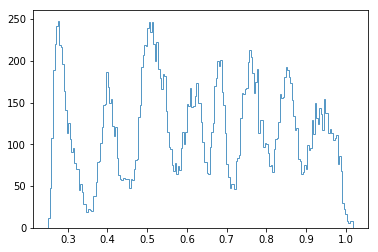

In [124]:
n, bins, patches = plt.hist(np.array(X).ravel(), bins=200, facecolor='g', alpha=0.75, histtype='step');
# original X is like array([[x1, x2, x3, ...]]), ravel() turns it into array([x1, x2, x3, ...]) so we can get right histogram

In [121]:
X

array([[0.259691, 0.264714, 0.258843, ..., 1.0003  , 0.977904, 0.959167]])

In [34]:
np.array(x)

array([115.73956466, 112.99148762, 108.267019  , ..., 111.247671  ,
       101.9970464 , 111.4020127 ])

In [35]:
X

array([[0.259691, 0.264714, 0.258843, ..., 1.0003  , 0.977904, 0.959167]])

In [11]:
np.dot(np.linalg.inv(np.dot(np.transpose(M), M)),np.transpose(M))

array([[ -4851.46543019,   -240.09297911,  -5705.35514925, ...,
        -11161.94381244,   1063.37230275,   4292.39038531],
       [  8870.54923029,    443.48867984,  10415.73015574, ...,
         -2123.03254422,    494.58916376,   3780.70021689],
       [ -3882.4781834 ,   -188.94626604,  -4579.00238308, ...,
        -28874.27606951,   2986.03464866,  13497.0313207 ],
       ...,
       [  7349.26791559,    366.70931094,   8633.25019418, ...,
          6740.40172333,   -524.81601948,  -1378.80552935],
       [-20580.37619405,  -1021.97936709, -24193.60603191, ...,
        -44313.85730362,   4212.51095283,  16887.12703276],
       [ -1657.46887889,    -84.17083066,  -1940.59831412, ...,
          9865.1899617 ,  -1115.497319  ,  -5565.30503472]])

In [12]:
M

array([[-1.40926412e-05, -9.90191613e-05, -2.15655690e-04, ...,
        -2.87982434e-03, -2.91225259e-03, -2.94701816e-03],
       [-4.08979992e-08, -4.61629642e-06, -1.09009652e-05, ...,
        -1.54837729e-04, -1.56599463e-04, -1.58489127e-04],
       [-1.89541449e-05, -1.17444392e-04, -2.52705823e-04, ...,
        -3.34090087e-03, -3.37845505e-03, -3.41871255e-03],
       ...,
       [-1.07627949e-02, -1.06470345e-02, -1.04767584e-02, ...,
        -8.03110705e-04, -5.14138449e-04, -1.86227657e-04],
       [ 1.71369125e-03,  1.69435736e-03,  1.66599493e-03, ...,
         9.42355755e-05,  4.78336239e-05, -4.79259652e-06],
       [ 1.20054710e-02,  1.18646284e-02,  1.16584541e-02, ...,
         4.60186341e-04,  1.32810684e-04, -2.38311544e-04]])

#### 1.4 

### Section 2. Motion Analysis of Protein Structure by Principal Component Analysis

#### 2.1 Introduction
Charcterized by the excellent ability to reduce dimensions and investigate correlations in large data sets, principal component analysis (PCA) is commonly used to extract useful information from a large scale MD simulation, which produce an immense quantity of data. It is particularly helpful to analyze the motions of flexible regions in proteins, identify systematic conformational changes of a system, detect ill-equlibrated regions of a structure, or compare the motions of two MD trajectories. In this section, we focus on a covalent enzyme-substrate intermediate with saccharide distortion in a mutant Bacteriophage T4 Lysozyme, trying to reveal the motion important motions in the protein (T4 lysozyme). We first explore the system of interst through the visualization of protein structure and its trajectory by using Visual Molecular Dynamics (VMD). Then, we will perform PCA on the trajectory and generate a porcupine plot of the protein to help the interpretation of the result. At last, we will compare different trajectories extract from the PCA to draw some simple conclusions.

#### 2.2 An Overview of the System

As mentioned above, the system of interest is a complex between the bacteriophage T4 lysozyme and a substrate cleaved from the cell wall of Escherichia Coli (E. Coli). The structure of the complex can be acquired from [Protein Data Bank (PDB)](https://www.rcsb.org/) and the only two files (`ref.pdb` and `md1_backbone.xtc`) we need for the analysis in this section were obtained from [Dr. de Groot's Group Website](http://www3.mpibpc.mpg.de/groups/de_groot/) (Max-Planck Institute for Biophysical Chemistry), which were extracted from an 184 ns of MD simulation on the backbone of T4 lysozyme (162 residues). 

To get a better understanding about the structure characteristics of the system before we do the analysis, we use Visual Molecular Dynamics (VMD) to visualize the structures of interest as follows.

**1. Setup the representations of the system**
<br> By appropriately using representation methods in VMD, characteristics of a structure can be clearly presented. After loading the structure file (`148L.pdb`), we create different representations for different parts of the system, as tabulated below.


|#|Representation |Selection             |Coloring method       |Drawing method|Material|Resolution|
|-|:-------------:|:--------------------:|:---------------------|:-------------|:-------|:---------|
|1|Protein        |Residue 0 to 163      |By secondary structure|NewCartoon    |RTChrome|50        |
|2|Catalytic sites|Residue 11, 20, and 26|By element            |Bonds         |Glossy  |200       |
|3|Substrate      |Resname MUB NAG       |By element            |Bonds         |Glossy  |200       |

** 2. Image generation**

After adjusting to an approriate angle, we display the structures in an orthographic manner and generate figures as below. As can be seen in the left panel The substrate is almost enclosed by the protein. According to the work [[3]](https://science.sciencemag.org/content/262/5142/2030.long) of Kuroki et al. Glu 11, Asp 20 and Glu 26 are the active sites, or catalytic residue of the protein. These residues are shown in bonds representation in the right panel below and there are obviously close to the substrate and buried in the a groove on the protein surface.

<tr>
<td> <img src="system_fig.bmp" style="width: 450px"> </td>
<td> <img src="big_fig.bmp" style="width: 450px"> </td>
</tr>

#### 3. Trajectory of the structure

With  trajectory file in `.pdb` format (`t4l.pdb`) which is also accessible from Dr. de Groot's group website, we can also make an animation easily by using VMD, as shown in the left panel below. But if we want to take a look at the trajectory of the backbone atoms, we can still convert `md1_backbone.xtc` we have to convert the trajectory file into `.pdb` format using GROMACS command as follows, with structural infomation provided by `ref.pdb`. (A `.xtc` file only contains coordinate data, while a `.pdb` file only contains structure information like atoms, residues and segment data.)
<br> `gmx_mpi trjconv -s ref.pdb -f md1_backbone.xtc -o md_traj.pdb`
<br> Loading the file `md_traj.pdb`, we can use VMD to obtain the anmiation of the backbone trajectory in the right panel.

<tr>
<td> <img src="structure_gif.gif"> </td>
<td> <img src="backbone_gif.gif"> </td>
</tr>

As shown above, it is really difficult to identify funtionally relevent motions of the structure by simply inspecting the trajectory animation, since both local fluctuations and collective motions occur simultaneously and it is hard to discern the two types of motion from each other. That's why we need the principal component analysis (PCA) to filter global or collective (often slow) motions from local (often) fast motions, which will be introduce in the next section.

#### 2.3 Principal Component Analysis of the Bacteriophage T4 Lysozyme Trajectory

To use Python to perform principal component analyssi (PCA), we first load in the required modules.

In [1]:
import numpy as np
import pandas as pd
import mdtraj as mdt
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from matplotlib import rc

First, load in the trajectory file and align to the initial strutcture (reference).

In [2]:
traj = mdt.load('md1_backbone.xtc', top='ref.pdb')   # supply topology information using .pdb file
# traj = <mdtraj.Trajectory with 1842 frames, 486 atoms, 162 residues, and unitcells at 0x1c5756139e8>
top = traj.topology        # <mdtraj.Topology with 1 chains, 162 residues, 486 atoms, 485 bonds at 0x23d949317b8>
traj.superpose(traj, 0)    # We use the initial structure as the reference

<mdtraj.Trajectory with 1842 frames, 486 atoms, 162 residues, and unitcells at 0x2e54e3d6278>

And now take a closer look at the funtions in MDtraj and prepare the input data for PCA.

In [3]:
xyz = traj.xyz            # traj.xyz output the cartesian coordinates of backbone at each time frame (from 0th to 2000th)
pca_input = xyz.reshape(traj.n_frames, traj.n_atoms*3)   # transform to the trajectory of all coodinates
print(xyz.shape)
print(pca_input.shape)
print(xyz[0])
print(pca_input[0])

(1842, 486, 3)
(1842, 1458)
[[3.736     2.025     2.6200001]
 [3.7760003 2.1660001 2.628    ]
 [3.6560001 2.25      2.6710002]
 ...
 [4.3240004 2.3470001 1.94     ]
 [4.392     2.219     1.9330001]
 [4.544     2.226     1.9260001]]
[3.736     2.025     2.6200001 ... 4.544     2.226     1.9260001]


Below we projected the data to the first 10 principal components to generate the Scree plot. Then, we plot a scatter plot based on the projected time frames.

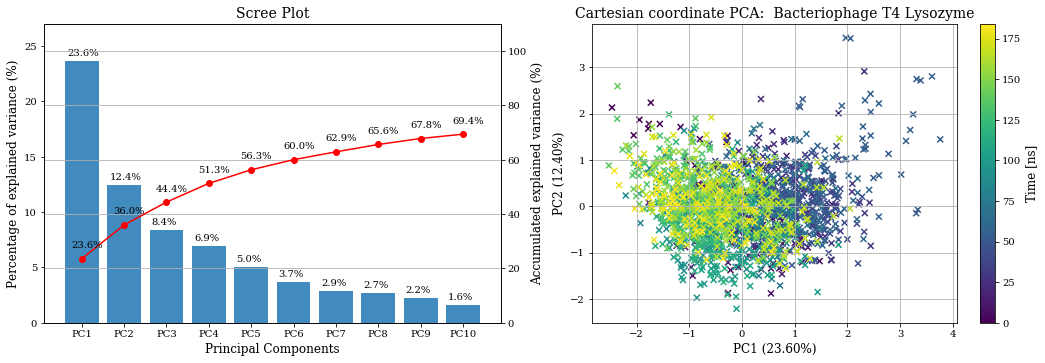

In [7]:
pca = PCA(n_components=10)                            # here n_features = 1458 (=486 x 3)
reduced_coordinates = pca.fit_transform(pca_input)    # dimension reduction of the backbone trajectory (projected to first 10 PCs)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)  # convert into percentages
accum_per_var = [i for i in [np.sum(per_var[:j]) for j in range(1,11)]] # accumulated values of per_var


# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})
plt.rc('font', family='serif')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5.5))

# Scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

ax1 = plt.subplot(1,2,1)
ax2 = ax1.twinx()
ax1.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, alpha = 0.85)
ax2.plot(range(1,len(per_var)+1), accum_per_var, color = 'r', marker = 'o')
xlocs, xlabs = plt.xticks()

# adding value labels
for i, v in enumerate(per_var):
    ax1.text(xlocs[i] - 0.35, v+0.5, str(v)+'%')

for i, v in enumerate(accum_per_var):
    ax2.text(xlocs[i] - 0.25, v+4, "{0:.1f}%".format(v))
    
ax1.set_ylabel('Percentage of explained variance (%)', size='12')
ax2.set_ylabel('Accumulated explained variance (%)', size='12')
ax1.set_xlabel('Principal Components', size='12')
ax1.set_ylim([0,27])
ax2.set_ylim([0,110])
plt.title('Scree Plot', size='14')
plt.grid(True)

# Scatter plot  
plt.subplot(1,2,2)
plt.scatter(reduced_coordinates[:, 0], reduced_coordinates[:,1], marker='x', c=traj.time/1000) # plot as a function PC1, PC2
plt.xlabel("PC1 ({0:.2f}%)".format(per_var[0]), size='12')
plt.ylabel("PC2 ({0:.2f}%)".format(per_var[1]), size='12')
plt.title('Cartesian coordinate PCA:  Bacteriophage T4 Lysozyme', size='14')
plt.grid(True)
cbar = plt.colorbar()
cbar.set_label('Time [ns]', size='12')

As shown in the Scree plot, the first 4 principal components account for over 50% of variance. Although this percentage is not that dominant compared to an ideal case, reducing a dataset of 1458 features to less than 10 principal components still show the funtionality of PCA. In the right panel above, it can be seen that the cluster of projected frames tend to move along the first principal component (PC1) in the negative direction, which might represent apparent conformational changes in the protein within the simulation time.

#### 2.4 Visualization of the Representative Motion of Bateriophage T4 Lysozyme

To obtain a better understanding about what conformational changes in protein might be within the simulation time, here we analyze the data using GROMACS and generate the porcupine plot of the structure. 

**1. Generation and diagonlization of the covariance matrix**
<br> First, we use the following GROMACS command to calculate and diagonalize the covariance matrix, and yields a set of eigenvectors and eigenvalues that describe collective modes of fluctuations of the protein.
<br> `gmx_mpi covar -s ref.pdb -f md1_backbone.xtc`
<br> The chose all the backbone atoms as the group for the least squares fit and for the covariance analysis. The command outputs four files in total, including `average.pdb`, the file containing the information of the average structure throughout the trajectory, `covar.log`, a file recording the process of performing covariance analysis,  `eigenval.xvg`, a file containing 1458 eigenvalues which can be used to generate the Scree plot (extremely close to what we got in Section 2.3 by using Python), and `eigenvec.trr`, a trjectory file of eigenvectors which can be proceeded to further analysis. 

**2. Analysis of the eigenvectors**
<br> To see what type of motion the individual eigenvectors correspond to, we filter the original trajectory and project out the part along a selected eigenvector by using the following command.
<br> `gmx_mpi anaeig -s ref.pdb -f md1_backbone.xtc -filt filter1.pdb -first 1 -last 1`
By using the flag `-first` and -`last`, we only project the trajectory on the first principal component and `filter1.pdb` is the corresponding trajectory file. We can use the same command the project the trajectory to the second principal component:
<br> `gmx_mpi anaeig -s ref.pdb -f md1_backbone.xtc -filt filter2.pdb -first 2 -last 2`
<br> With `filter1.pdb` and `filter2.pdb`, we can then visualize the trajectory as the left panel below by using VMD.

<tr>
<td> <img src="filter1_gif.gif"> </td>
<td> <img src="filter2_gif.gif"> </td>
</tr>

**3. Interpolation of the exreme conformations**

As shown above, the motions of the structure is much less noisy before we project the trajectory data. However, it can also be seen from above that large-scle motions do not occur smoothly, but stochastically. To make the animations smoother, we can artificially interpoloate between the extreme conformations sampled during the simulation along the eigenvector. (Here we interpolate 50 frames between the extreme conformations by using the flag `-nframes`.)
<br> `gmx_mpi anaeig -s ref.pdb -f md1_backbone.xtc -extr extreme1.pdb -first 1 -last 1 -nframes 50`
<br> With the extreme conforations, we can use VMD to plot the porcupine plot to show the difference between extreme conformations and the main direction that the structure was moving. 
- Step 1: To generate a porcupine plot, we should download `Porcuplin.tcl` from [here](http://www.ks.uiuc.edu/Research/vmd/mailing_list/vmd-l/att-15365/PorcupinePlot.tcl) and save the file in the same folder of VMD.
- Step 2: Use a text editor to save the first frame in `extreme1.pdb` to `first_frame.pdb` and save the last frame in `last_frame.pdb`. Then load these to `.pdb` files as new molecules to VMD.
- Step 3: Adjust the representations and the displaying method of the two structures.
- Step 4: Open Tk Console in VMD and type `play Porcupine.tcl` to activate the `.tcl` file.
- Step 5: In the Tk Console, use the command `atomselect 0 "name CA"` and `atomselect 1 "name CA"` to select the first and the last frame, respectively. 
- Step 6: Use the command `porcupineplot::Diff atomselect0 atomselect1` to plot the arrows starting from the first frame to the last frame.

<img src="porcupine_plot.bmp">

As shown above, there is an apparent difference between the two extreme conformations. We can also observe that the two domains tend to get closer to each other.

#### 2.5 Other Applications to PCA on MD Simulations

###  Conclusion

In Section 1. blablabla

### References

- Luca Maragliano and Eric Vanden-Eijnden.Single-sweep methods for free energy calculations. 2008.doi:10.1063/1.2907241. [[1]](https://aip.scitation.org/doi/full/10.1063/1.2907241)
- Yilin Meng and Benoˆıt Roux.Efficient determination of free energy landscapes in multiple dimensionsfrom biased umbrella sampling simulations using linear regression. 2015.doi:10.1021/ct01130r. [[2]](https://pubs.acs.org/doi/abs/10.1021/ct501130r)
- Kuroki, R., Weaver, L., & Matthews, B. (1993). A covalent enzyme-substrate intermediate with saccharide distortion in a mutant T4 lysozyme. Science, 262(5142), 2030-2033. doi:10.1126/science.8266098 [[3]](https://science.sciencemag.org/content/262/5142/2030.long)



- Francois  Sicard  and  Patrick  Senet.Reconstructing  the  free-energy  landscape  of  Met-enkephalin  usingdihedral principal component analysis and well-tempered metadynamics. 2013.doi:10.1063/1.481088